In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

In [2]:
df = pd.read_csv("dataset/ted.csv")
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [4]:
for col in df.columns:
    print("{}: {}".format(col ,df[col].isnull().sum()))

comments: 0
description: 0
duration: 0
event: 0
film_date: 0
languages: 0
main_speaker: 0
name: 0
num_speaker: 0
published_date: 0
ratings: 0
related_talks: 0
speaker_occupation: 6
tags: 0
title: 0
url: 0
views: 0


In [5]:
for col in df.columns:
    print("{}: {}".format(col ,df[col].unique().shape[0]))

comments: 559
description: 2550
duration: 1083
event: 355
film_date: 735
languages: 66
main_speaker: 2156
name: 2550
num_speaker: 5
published_date: 2490
ratings: 2550
related_talks: 2550
speaker_occupation: 1459
tags: 2530
title: 2550
url: 2550
views: 2550


In [6]:
df["event"].value_counts()[:70]

TED2014                 84
TED2009                 83
TED2013                 77
TED2016                 77
TED2015                 75
                        ..
TED Talks Education      8
TEDMED 2011              7
TEDSalon London 2010     7
TEDxPSU                  7
TEDxWomen 2011           7
Name: event, Length: 70, dtype: int64

In [7]:
def extract_year(s):
    s = str(s).strip()
    pattern = r"[0-9]{4}$"
    ls = re.findall(pattern, s)
    if len(ls) > 0:
        return ls[0]
    else:
        return np.nan

In [8]:
df["year"] = df["event"].apply(extract_year)

In [9]:
df["year"].value_counts()
df["year"].isnull().sum()

734

In [10]:
df[["comments", "num_speaker"]].groupby("num_speaker").mean().sort_values(by = "comments", ascending = False)

,comments
num_speaker,
1,192.990770
2,140.755102
4,90.333333
3,75.400000
5,6.000000


In [11]:
df["num_speaker"].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

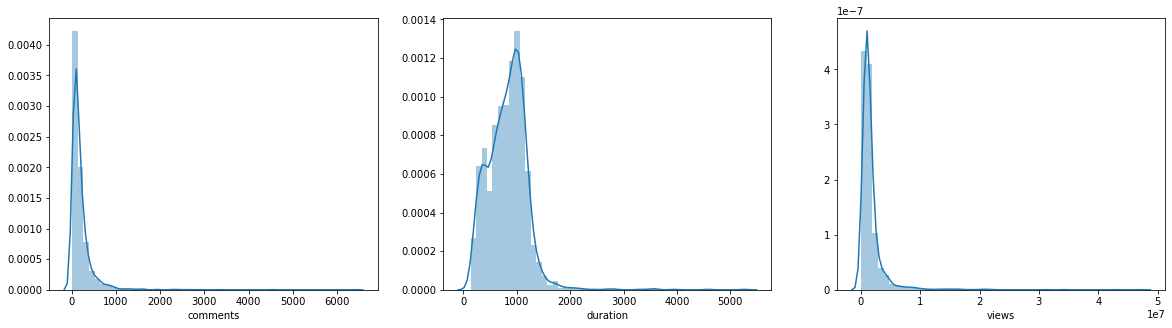

In [12]:
fig, axs = plt.subplots(figsize=(20,5), ncols=3)

for idx, col in enumerate(["comments", "duration", "views"]):
    sns.distplot(df[col], ax = axs[idx])
    

In [13]:
df["ratings"].values[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [14]:
rating_emo = []


In [33]:
for val in df["ratings"].values:
    val = val[1:-1]
    nval = re.sub(r"},", "};", val)
    nval = nval.split(";")
#     print(nval)
    for rate in nval:
        print(rate)
        nameP = r"\'([A-Za-z]+)\'"


{'id': 7, 'name': 'Funny', 'count': 19645}
 {'id': 1, 'name': 'Beautiful', 'count': 4573}
 {'id': 9, 'name': 'Ingenious', 'count': 6073}
 {'id': 3, 'name': 'Courageous', 'count': 3253}
 {'id': 11, 'name': 'Longwinded', 'count': 387}
 {'id': 2, 'name': 'Confusing', 'count': 242}
 {'id': 8, 'name': 'Informative', 'count': 7346}
 {'id': 22, 'name': 'Fascinating', 'count': 10581}
 {'id': 21, 'name': 'Unconvincing', 'count': 300}
 {'id': 24, 'name': 'Persuasive', 'count': 10704}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}
 {'id': 25, 'name': 'OK', 'count': 1174}
 {'id': 26, 'name': 'Obnoxious', 'count': 209}
 {'id': 10, 'name': 'Inspiring', 'count': 24924}
{'id': 7, 'name': 'Funny', 'count': 544}
 {'id': 3, 'name': 'Courageous', 'count': 139}
 {'id': 2, 'name': 'Confusing', 'count': 62}
 {'id': 1, 'name': 'Beautiful', 'count': 58}
 {'id': 21, 'name': 'Unconvincing', 'count': 258}
 {'id': 11, 'name': 'Longwinded', 'count': 113}
 {'id': 8, 'name': 'Informative', 'count': 443}
 {'id': 1

 {'id': 3, 'name': 'Courageous', 'count': 12}
 {'id': 21, 'name': 'Unconvincing', 'count': 43}
 {'id': 26, 'name': 'Obnoxious', 'count': 20}
 {'id': 1, 'name': 'Beautiful', 'count': 59}
 {'id': 22, 'name': 'Fascinating', 'count': 82}
 {'id': 9, 'name': 'Ingenious', 'count': 29}
 {'id': 7, 'name': 'Funny', 'count': 9}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 7}
{'id': 25, 'name': 'OK', 'count': 139}
 {'id': 8, 'name': 'Informative', 'count': 90}
 {'id': 22, 'name': 'Fascinating', 'count': 68}
 {'id': 10, 'name': 'Inspiring', 'count': 127}
 {'id': 7, 'name': 'Funny', 'count': 100}
 {'id': 24, 'name': 'Persuasive', 'count': 8}
 {'id': 3, 'name': 'Courageous', 'count': 14}
 {'id': 11, 'name': 'Longwinded', 'count': 161}
 {'id': 2, 'name': 'Confusing', 'count': 30}
 {'id': 9, 'name': 'Ingenious', 'count': 23}
 {'id': 21, 'name': 'Unconvincing', 'count': 45}
 {'id': 26, 'name': 'Obnoxious', 'count': 36}
 {'id': 1, 'name': 'Beautiful', 'count': 49}
 {'id': 23, 'name': 'Jaw-dropping', 'cou

 {'id': 25, 'name': 'OK', 'count': 15}
 {'id': 7, 'name': 'Funny', 'count': 5}
 {'id': 11, 'name': 'Longwinded', 'count': 0}
{'id': 8, 'name': 'Informative', 'count': 598}
 {'id': 9, 'name': 'Ingenious', 'count': 121}
 {'id': 7, 'name': 'Funny', 'count': 648}
 {'id': 22, 'name': 'Fascinating', 'count': 354}
 {'id': 24, 'name': 'Persuasive', 'count': 44}
 {'id': 25, 'name': 'OK', 'count': 62}
 {'id': 11, 'name': 'Longwinded', 'count': 33}
 {'id': 1, 'name': 'Beautiful', 'count': 26}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 38}
 {'id': 26, 'name': 'Obnoxious', 'count': 22}
 {'id': 21, 'name': 'Unconvincing', 'count': 9}
 {'id': 10, 'name': 'Inspiring', 'count': 24}
 {'id': 2, 'name': 'Confusing', 'count': 10}
 {'id': 3, 'name': 'Courageous', 'count': 5}
{'id': 10, 'name': 'Inspiring', 'count': 89}
 {'id': 7, 'name': 'Funny', 'count': 125}
 {'id': 22, 'name': 'Fascinating', 'count': 87}
 {'id': 8, 'name': 'Informative', 'count': 109}
 {'id': 24, 'name': 'Persuasive', 'count': 66}
 {'i

 {'id': 26, 'name': 'Obnoxious', 'count': 5}
 {'id': 7, 'name': 'Funny', 'count': 1}
 {'id': 1, 'name': 'Beautiful', 'count': 0}
 {'id': 11, 'name': 'Longwinded', 'count': 0}
{'id': 22, 'name': 'Fascinating', 'count': 108}
 {'id': 8, 'name': 'Informative', 'count': 260}
 {'id': 11, 'name': 'Longwinded', 'count': 28}
 {'id': 21, 'name': 'Unconvincing', 'count': 76}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 36}
 {'id': 24, 'name': 'Persuasive', 'count': 51}
 {'id': 10, 'name': 'Inspiring', 'count': 38}
 {'id': 3, 'name': 'Courageous', 'count': 16}
 {'id': 25, 'name': 'OK', 'count': 67}
 {'id': 9, 'name': 'Ingenious', 'count': 13}
 {'id': 26, 'name': 'Obnoxious', 'count': 22}
 {'id': 7, 'name': 'Funny', 'count': 12}
 {'id': 2, 'name': 'Confusing', 'count': 17}
 {'id': 1, 'name': 'Beautiful', 'count': 21}
{'id': 8, 'name': 'Informative', 'count': 155}
 {'id': 24, 'name': 'Persuasive', 'count': 119}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 50}
 {'id': 22, 'name': 'Fascinating', 'coun

 {'id': 26, 'name': 'Obnoxious', 'count': 24}
 {'id': 2, 'name': 'Confusing', 'count': 5}
 {'id': 11, 'name': 'Longwinded', 'count': 1}
{'id': 8, 'name': 'Informative', 'count': 1437}
 {'id': 22, 'name': 'Fascinating', 'count': 1391}
 {'id': 24, 'name': 'Persuasive', 'count': 701}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 184}
 {'id': 10, 'name': 'Inspiring', 'count': 1112}
 {'id': 7, 'name': 'Funny', 'count': 523}
 {'id': 3, 'name': 'Courageous', 'count': 232}
 {'id': 1, 'name': 'Beautiful', 'count': 364}
 {'id': 9, 'name': 'Ingenious', 'count': 279}
 {'id': 25, 'name': 'OK', 'count': 130}
 {'id': 11, 'name': 'Longwinded', 'count': 116}
 {'id': 21, 'name': 'Unconvincing', 'count': 70}
 {'id': 26, 'name': 'Obnoxious', 'count': 74}
 {'id': 2, 'name': 'Confusing', 'count': 29}
{'id': 24, 'name': 'Persuasive', 'count': 107}
 {'id': 8, 'name': 'Informative', 'count': 176}
 {'id': 22, 'name': 'Fascinating', 'count': 12}
 {'id': 11, 'name': 'Longwinded', 'count': 21}
 {'id': 23, 'name': '

 {'id': 8, 'name': 'Informative', 'count': 230}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 82}
 {'id': 7, 'name': 'Funny', 'count': 32}
 {'id': 25, 'name': 'OK', 'count': 62}
 {'id': 3, 'name': 'Courageous', 'count': 30}
 {'id': 21, 'name': 'Unconvincing', 'count': 50}
 {'id': 2, 'name': 'Confusing', 'count': 5}
 {'id': 26, 'name': 'Obnoxious', 'count': 10}
 {'id': 11, 'name': 'Longwinded', 'count': 6}
 {'id': 24, 'name': 'Persuasive', 'count': 36}
{'id': 24, 'name': 'Persuasive', 'count': 161}
 {'id': 10, 'name': 'Inspiring', 'count': 248}
 {'id': 8, 'name': 'Informative', 'count': 673}
 {'id': 1, 'name': 'Beautiful', 'count': 73}
 {'id': 22, 'name': 'Fascinating', 'count': 1032}
 {'id': 9, 'name': 'Ingenious', 'count': 173}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 179}
 {'id': 2, 'name': 'Confusing', 'count': 71}
 {'id': 11, 'name': 'Longwinded', 'count': 48}
 {'id': 21, 'name': 'Unconvincing', 'count': 47}
 {'id': 7, 'name': 'Funny', 'count': 168}
 {'id': 25, 'name': 'OK', 'co

{'id': 10, 'name': 'Inspiring', 'count': 73}
 {'id': 8, 'name': 'Informative', 'count': 85}
 {'id': 9, 'name': 'Ingenious', 'count': 167}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 27}
 {'id': 21, 'name': 'Unconvincing', 'count': 24}
 {'id': 24, 'name': 'Persuasive', 'count': 36}
 {'id': 25, 'name': 'OK', 'count': 23}
 {'id': 11, 'name': 'Longwinded', 'count': 3}
 {'id': 22, 'name': 'Fascinating', 'count': 42}
 {'id': 1, 'name': 'Beautiful', 'count': 2}
 {'id': 26, 'name': 'Obnoxious', 'count': 7}
 {'id': 3, 'name': 'Courageous', 'count': 8}
 {'id': 2, 'name': 'Confusing', 'count': 7}
 {'id': 7, 'name': 'Funny', 'count': 1}
{'id': 21, 'name': 'Unconvincing', 'count': 322}
 {'id': 9, 'name': 'Ingenious', 'count': 474}
 {'id': 10, 'name': 'Inspiring', 'count': 1302}
 {'id': 7, 'name': 'Funny', 'count': 258}
 {'id': 3, 'name': 'Courageous', 'count': 519}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 104}
 {'id': 24, 'name': 'Persuasive', 'count': 1070}
 {'id': 8, 'name': 'Informative', '

 {'id': 24, 'name': 'Persuasive', 'count': 130}
 {'id': 3, 'name': 'Courageous', 'count': 335}
 {'id': 10, 'name': 'Inspiring', 'count': 155}
 {'id': 7, 'name': 'Funny', 'count': 101}
 {'id': 1, 'name': 'Beautiful', 'count': 19}
 {'id': 9, 'name': 'Ingenious', 'count': 27}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 46}
 {'id': 26, 'name': 'Obnoxious', 'count': 9}
 {'id': 25, 'name': 'OK', 'count': 58}
{'id': 10, 'name': 'Inspiring', 'count': 785}
 {'id': 9, 'name': 'Ingenious', 'count': 182}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 181}
 {'id': 24, 'name': 'Persuasive', 'count': 168}
 {'id': 8, 'name': 'Informative', 'count': 99}
 {'id': 1, 'name': 'Beautiful', 'count': 112}
 {'id': 3, 'name': 'Courageous', 'count': 121}
 {'id': 22, 'name': 'Fascinating', 'count': 132}
 {'id': 7, 'name': 'Funny', 'count': 200}
 {'id': 26, 'name': 'Obnoxious', 'count': 7}
 {'id': 25, 'name': 'OK', 'count': 8}
 {'id': 21, 'name': 'Unconvincing', 'count': 1}
 {'id': 11, 'name': 'Longwinded', 'count'

 {'id': 3, 'name': 'Courageous', 'count': 8}
 {'id': 2, 'name': 'Confusing', 'count': 3}
{'id': 8, 'name': 'Informative', 'count': 1545}
 {'id': 7, 'name': 'Funny', 'count': 726}
 {'id': 26, 'name': 'Obnoxious', 'count': 112}
 {'id': 9, 'name': 'Ingenious', 'count': 182}
 {'id': 24, 'name': 'Persuasive', 'count': 85}
 {'id': 22, 'name': 'Fascinating', 'count': 139}
 {'id': 1, 'name': 'Beautiful', 'count': 41}
 {'id': 11, 'name': 'Longwinded', 'count': 52}
 {'id': 25, 'name': 'OK', 'count': 300}
 {'id': 10, 'name': 'Inspiring', 'count': 39}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 54}
 {'id': 21, 'name': 'Unconvincing', 'count': 69}
 {'id': 2, 'name': 'Confusing', 'count': 19}
 {'id': 3, 'name': 'Courageous', 'count': 8}
{'id': 8, 'name': 'Informative', 'count': 351}
 {'id': 10, 'name': 'Inspiring', 'count': 478}
 {'id': 9, 'name': 'Ingenious', 'count': 141}
 {'id': 24, 'name': 'Persuasive', 'count': 290}
 {'id': 21, 'name': 'Unconvincing', 'count': 46}
 {'id': 25, 'name': 'OK', 'co

 {'id': 24, 'name': 'Persuasive', 'count': 198}
 {'id': 11, 'name': 'Longwinded', 'count': 22}
 {'id': 3, 'name': 'Courageous', 'count': 127}
 {'id': 26, 'name': 'Obnoxious', 'count': 8}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 26}
 {'id': 2, 'name': 'Confusing', 'count': 13}
 {'id': 1, 'name': 'Beautiful', 'count': 20}
 {'id': 7, 'name': 'Funny', 'count': 2}
{'id': 3, 'name': 'Courageous', 'count': 40}
 {'id': 10, 'name': 'Inspiring', 'count': 106}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 176}
 {'id': 8, 'name': 'Informative', 'count': 139}
 {'id': 1, 'name': 'Beautiful', 'count': 32}
 {'id': 9, 'name': 'Ingenious', 'count': 77}
 {'id': 22, 'name': 'Fascinating', 'count': 207}
 {'id': 24, 'name': 'Persuasive', 'count': 28}
 {'id': 11, 'name': 'Longwinded', 'count': 12}
 {'id': 21, 'name': 'Unconvincing', 'count': 15}
 {'id': 25, 'name': 'OK', 'count': 33}
 {'id': 26, 'name': 'Obnoxious', 'count': 5}
 {'id': 2, 'name': 'Confusing', 'count': 9}
 {'id': 7, 'name': 'Funny', 'count

 {'id': 11, 'name': 'Longwinded', 'count': 7}
 {'id': 7, 'name': 'Funny', 'count': 6}
 {'id': 26, 'name': 'Obnoxious', 'count': 0}
{'id': 8, 'name': 'Informative', 'count': 109}
 {'id': 1, 'name': 'Beautiful', 'count': 146}
 {'id': 3, 'name': 'Courageous', 'count': 122}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 15}
 {'id': 2, 'name': 'Confusing', 'count': 18}
 {'id': 21, 'name': 'Unconvincing', 'count': 44}
 {'id': 25, 'name': 'OK', 'count': 33}
 {'id': 10, 'name': 'Inspiring', 'count': 68}
 {'id': 24, 'name': 'Persuasive', 'count': 24}
 {'id': 26, 'name': 'Obnoxious', 'count': 21}
 {'id': 22, 'name': 'Fascinating', 'count': 24}
 {'id': 9, 'name': 'Ingenious', 'count': 4}
 {'id': 11, 'name': 'Longwinded', 'count': 13}
 {'id': 7, 'name': 'Funny', 'count': 4}
{'id': 7, 'name': 'Funny', 'count': 701}
 {'id': 22, 'name': 'Fascinating', 'count': 657}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 86}
 {'id': 1, 'name': 'Beautiful', 'count': 405}
 {'id': 9, 'name': 'Ingenious', 'count': 428

 {'id': 8, 'name': 'Informative', 'count': 114}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 25}
 {'id': 2, 'name': 'Confusing', 'count': 11}
 {'id': 26, 'name': 'Obnoxious', 'count': 6}
 {'id': 11, 'name': 'Longwinded', 'count': 20}
 {'id': 21, 'name': 'Unconvincing', 'count': 19}
 {'id': 25, 'name': 'OK', 'count': 17}
 {'id': 1, 'name': 'Beautiful', 'count': 30}
 {'id': 7, 'name': 'Funny', 'count': 5}
 {'id': 9, 'name': 'Ingenious', 'count': 3}
{'id': 7, 'name': 'Funny', 'count': 221}
 {'id': 8, 'name': 'Informative', 'count': 394}
 {'id': 22, 'name': 'Fascinating', 'count': 319}
 {'id': 9, 'name': 'Ingenious', 'count': 96}
 {'id': 1, 'name': 'Beautiful', 'count': 21}
 {'id': 21, 'name': 'Unconvincing', 'count': 31}
 {'id': 26, 'name': 'Obnoxious', 'count': 31}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 62}
 {'id': 25, 'name': 'OK', 'count': 45}
 {'id': 24, 'name': 'Persuasive', 'count': 50}
 {'id': 10, 'name': 'Inspiring', 'count': 54}
 {'id': 2, 'name': 'Confusing', 'count': 8}
 

 {'id': 7, 'name': 'Funny', 'count': 6}
 {'id': 2, 'name': 'Confusing', 'count': 7}
 {'id': 25, 'name': 'OK', 'count': 27}
 {'id': 26, 'name': 'Obnoxious', 'count': 2}
 {'id': 9, 'name': 'Ingenious', 'count': 25}
 {'id': 21, 'name': 'Unconvincing', 'count': 9}
 {'id': 11, 'name': 'Longwinded', 'count': 11}
{'id': 25, 'name': 'OK', 'count': 38}
 {'id': 10, 'name': 'Inspiring', 'count': 50}
 {'id': 8, 'name': 'Informative', 'count': 113}
 {'id': 24, 'name': 'Persuasive', 'count': 55}
 {'id': 3, 'name': 'Courageous', 'count': 58}
 {'id': 1, 'name': 'Beautiful', 'count': 17}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 30}
 {'id': 21, 'name': 'Unconvincing', 'count': 7}
 {'id': 22, 'name': 'Fascinating', 'count': 18}
 {'id': 2, 'name': 'Confusing', 'count': 4}
 {'id': 9, 'name': 'Ingenious', 'count': 1}
 {'id': 7, 'name': 'Funny', 'count': 3}
 {'id': 26, 'name': 'Obnoxious', 'count': 1}
 {'id': 11, 'name': 'Longwinded', 'count': 3}
{'id': 8, 'name': 'Informative', 'count': 1329}
 {'id': 10

 {'id': 3, 'name': 'Courageous', 'count': 173}
 {'id': 8, 'name': 'Informative', 'count': 50}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 21}
 {'id': 9, 'name': 'Ingenious', 'count': 6}
 {'id': 22, 'name': 'Fascinating', 'count': 22}
 {'id': 24, 'name': 'Persuasive', 'count': 74}
 {'id': 2, 'name': 'Confusing', 'count': 1}
 {'id': 11, 'name': 'Longwinded', 'count': 4}
 {'id': 26, 'name': 'Obnoxious', 'count': 4}
 {'id': 21, 'name': 'Unconvincing', 'count': 11}
 {'id': 7, 'name': 'Funny', 'count': 6}
{'id': 10, 'name': 'Inspiring', 'count': 196}
 {'id': 1, 'name': 'Beautiful', 'count': 35}
 {'id': 3, 'name': 'Courageous', 'count': 83}
 {'id': 22, 'name': 'Fascinating', 'count': 38}
 {'id': 24, 'name': 'Persuasive', 'count': 55}
 {'id': 9, 'name': 'Ingenious', 'count': 17}
 {'id': 8, 'name': 'Informative', 'count': 49}
 {'id': 25, 'name': 'OK', 'count': 22}
 {'id': 23, 'name': 'Jaw-dropping', 'count': 10}
 {'id': 11, 'name': 'Longwinded', 'count': 1}
 {'id': 26, 'name': 'Obnoxious', 'co

In [35]:
rating_emo = list(set(rating_emo))

In [37]:
def get_count(s):
    val = s[1:-1]
    nameP = r"[0-9]+"
    Rval = re.findall(nameP, val)
    return Rval[1]


In [38]:
for emo in rating_emo:
    df[emo] = df["ratings"].apply(get_count)

In [39]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Unconvincing,OK,count,Obnoxious,Fascinating,Informative,Courageous,Confusing,Longwinded,Funny
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,19645,19645,19645,19645,19645,19645,19645,19645,19645,19645
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,544,544,544,544,544,544,544,544,544,544
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,964,964,964,964,964,964,964,964,964,964
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,760,760,760,760,760,760,760,760,760,760
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,3202,3202,3202,3202,3202,3202,3202,3202,3202,3202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,...,24,24,24,24,24,24,24,24,24,24
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,...,32,32,32,32,32,32,32,32,32,32
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,...,14,14,14,14,14,14,14,14,14,14
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,...,3,3,3,3,3,3,3,3,3,3
